In [ ]:
import pandas as pd
import numpy as  np 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

import warnings 
warnings.filterwarnings("ignore")


In [7]:
df= pd.read_csv("netflix_title.csv")

In [8]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [10]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


Dropping show id as it is not required for our analysis

In [11]:
df.drop(columns='show_id' , inplace=True)

In [12]:
df.nunique().sort_values(ascending=False)

title           8807
description     8775
cast            7692
director        4528
date_added      1767
country          748
listed_in        514
duration         220
release_year      74
rating            17
type               2
dtype: int64

In [13]:
df.columns

Index(['type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [14]:
df.rename(columns={'listed_in':'Genre'} , inplace=True)
df.columns

Index(['type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'Genre', 'description'],
      dtype='object')

Checking the duplicates

In [15]:
df.duplicated().sum()

np.int64(0)

Checking the stats of missing data


In [16]:
null = df.isna().sum()
percent = round(df.isna().mean() * 100, 2)

missing_data = pd.DataFrame({'Missing Count': null, 'Percentage': percent})
missing_data = missing_data[missing_data['Missing Count'] > 0].sort_values(by='Missing Count', ascending=False)

print(f'Total Records: {df.shape[0]}')
print(missing_data)
print(f'Total Missing: {missing_data["Missing Count"].sum()} ({round(round(missing_data["Missing Count"].sum() * 100 / df.shape[0],2),2)-100}%)')


Total Records: 8807
            Missing Count  Percentage
director             2634       29.91
country               831        9.44
cast                  825        9.37
date_added             10        0.11
rating                  4        0.05
duration                3        0.03
Total Missing: 4307 (-51.1%)


DEALING WITH THE MISSING VALUES

Dropping the NaN values from the ratings, duration, date_added columns

In [17]:
df.dropna(subset=['duration','rating', 'date_added'], inplace=True )

In [18]:
null = df.isna().sum()
percent = round(df.isna().mean() * 100, 2)

missing_data = pd.DataFrame({'Missing Count': null, 'Percentage': percent})
missing_data = missing_data[missing_data['Missing Count'] > 0].sort_values(by='Missing Count', ascending=False)

print(f'Total Records: {df.shape[0]}')
print(missing_data)
print(f'Total Missing: {missing_data["Missing Count"].sum()} ({round(round(missing_data["Missing Count"].sum() * 100 / df.shape[0],2),2)-100}%)')


Total Records: 8790
          Missing Count  Percentage
director           2621       29.82
country             829        9.43
cast                825        9.39
Total Missing: 4275 (-51.37%)


In [19]:
df[df['director'].isna()& df['country'].isna()& df['cast'].isna()]

,type,title,director,cast,country,date_added,release_year,rating,duration,Genre,description
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
10,TV Show,"Vendetta: Truth, Lies and The Mafia",NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B..."
14,TV Show,Crime Stories: India Detectives,NaN,NaN,NaN,"September 22, 2021",2021,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Docuseries",Cameras following Bengaluru police on the job ...
74,TV Show,The World's Most Amazing Vacation Rentals,NaN,NaN,NaN,"September 14, 2021",2021,TV-PG,2 Seasons,Reality TV,"With an eye for every budget, three travelers ..."
123,TV Show,Luv Kushh,NaN,NaN,NaN,"September 2, 2021",2012,TV-Y7,1 Season,Kids' TV,"Based on the last book of the epic Ramayana, t..."
...,...,...,...,...,...,...,...,...,...,...,...
7812,TV Show,Queens of Comedy,NaN,NaN,NaN,"May 1, 2018",2017,TV-MA,1 Season,"International TV Shows, Stand-Up Comedy & Talk...",Eight women perform in front of celebrity judg...
8109,TV Show,Strongland,NaN,NaN,NaN,"January 18, 2019",2018,TV-PG,1 Season,"Docuseries, International TV Shows",From Spain's countryside to Scotland's stony t...
8199,TV Show,The Bachelor,NaN,NaN,NaN,"December 1, 2019",2009,TV-14,1 Season,"Reality TV, Romantic TV Shows",A single man searches for his soulmate through...
8609,TV Show,Towies,NaN,NaN,NaN,"December 27, 2017",2016,TV-MA,1 Season,"International TV Shows, Reality TV",Australia's toughest tow truck operators work ...


total 96 such rows are there which dont have director, country and cast as null, so dropping those rows.

In [20]:
df.dropna(subset = ['director','country','cast'], how = 'all',inplace=True)
df.shape

(8694, 11)

In [21]:
null = df.isna().sum()
percent = round(df.isna().mean() * 100, 2)

missing_data = pd.DataFrame({'Missing Count': null, 'Percentage': percent})
missing_data = missing_data[missing_data['Missing Count'] > 0].sort_values(by='Missing Count', ascending=False)

print(f'Total Records: {df.shape[0]}')
print(missing_data)
print(f'Total Missing: {missing_data["Missing Count"].sum()} ({round(round(missing_data["Missing Count"].sum() * 100 / df.shape[0],2),2)-100}%)')


Total Records: 8694
          Missing Count  Percentage
director           2525       29.04
country             733        8.43
cast                729        8.39
Total Missing: 3987 (-54.14%)


Replacing the NaN values with 'Unknown'

In [22]:
df.fillna({'director':'Unknown','cast':'Unknown',"country":'Unknown'},inplace=True)

In [23]:
df

,type,title,director,cast,country,date_added,release_year,rating,duration,Genre,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
4,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
...,...,...,...,...,...,...,...,...,...,...,...
8801,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


Dealing with the date and time

In [24]:
df['date_added']=pd.to_datetime(df['date_added'],format='mixed')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8694 entries, 0 to 8806
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          8694 non-null   object        
 1   title         8694 non-null   object        
 2   director      8694 non-null   object        
 3   cast          8694 non-null   object        
 4   country       8694 non-null   object        
 5   date_added    8694 non-null   datetime64[ns]
 6   release_year  8694 non-null   int64         
 7   rating        8694 non-null   object        
 8   duration      8694 non-null   object        
 9   Genre         8694 non-null   object        
 10  description   8694 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 815.1+ KB


In [25]:
df['day'] = df['date_added'].dt.day
df['month'] = df['date_added'].dt.month
df['year'] = df['date_added'].dt.year
df['month_name'] = df['date_added'].dt.month_name()
df['weekday'] = df['date_added'].dt.day_name()
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,Genre,description,day,month,year,month_name,weekday
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",25,9,2021,September,Saturday
1,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,24,9,2021,September,Friday
4,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,24,9,2021,September,Friday
5,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Unknown,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,24,9,2021,September,Friday


In [26]:
df

,type,title,director,cast,country,date_added,release_year,rating,duration,Genre,description,day,month,year,month_name,weekday
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",25,9,2021,September,Saturday
1,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,24,9,2021,September,Friday
4,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,24,9,2021,September,Friday
5,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Unknown,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,24,9,2021,September,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",2016-03-09,2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,9,3,2016,March,Wednesday
8802,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",20,11,2019,November,Wednesday
8804,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,1,11,2019,November,Friday
8805,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",11,1,2020,January,Saturday


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8694 entries, 0 to 8806
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          8694 non-null   object        
 1   title         8694 non-null   object        
 2   director      8694 non-null   object        
 3   cast          8694 non-null   object        
 4   country       8694 non-null   object        
 5   date_added    8694 non-null   datetime64[ns]
 6   release_year  8694 non-null   int64         
 7   rating        8694 non-null   object        
 8   duration      8694 non-null   object        
 9   Genre         8694 non-null   object        
 10  description   8694 non-null   object        
 11  day           8694 non-null   int32         
 12  month         8694 non-null   int32         
 13  year          8694 non-null   int32         
 14  month_name    8694 non-null   object        
 15  weekday       8694 non-null   object       

In [28]:
df.duplicated().sum()

np.int64(0)

creating two different data sets of movies and tv shows for a better insight

In [29]:
df_movies = df.loc[df['type']=='Movie']
df_tvs = df.loc[df['type']=='TV Show']

In [30]:
df_movies

,type,title,director,cast,country,date_added,release_year,rating,duration,Genre,description,day,month,year,month_name,weekday
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",25,9,2021,September,Saturday
6,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,24,9,2021,September,Friday
7,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",24,9,2021,September,Friday
9,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,24,9,2021,September,Friday
12,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,23,9,2021,September,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",2016-03-09,2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,9,3,2016,March,Wednesday
8802,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",20,11,2019,November,Wednesday
8804,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,1,11,2019,November,Friday
8805,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",11,1,2020,January,Saturday


In [31]:
df_tvs

,type,title,director,cast,country,date_added,release_year,rating,duration,Genre,description,day,month,year,month_name,weekday
1,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,24,9,2021,September,Friday
4,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,24,9,2021,September,Friday
5,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Unknown,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,24,9,2021,September,Friday
8,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,24,9,2021,September,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8785,TV Show,YOM,Unknown,"Sairaj, Devyani Dagaonkar, Ketan Singh, Mayur ...",Unknown,2018-06-07,2016,TV-Y7,1 Season,Kids' TV,"With the mind of a human being, and the body o...",7,6,2018,June,Thursday
8795,TV Show,Yu-Gi-Oh! Arc-V,Unknown,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada",2018-05-01,2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...,1,5,2018,May,Tuesday
8796,TV Show,Yunus Emre,Unknown,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves...",17,1,2017,January,Tuesday
8797,TV Show,Zak Storm,Unknown,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia",2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...,13,9,2018,September,Thursday


removing the word "min"

In [32]:
df_movies['duration'] = df['duration'].str.replace('min' ,"")
df_movies

,type,title,director,cast,country,date_added,release_year,rating,duration,Genre,description,day,month,year,month_name,weekday
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",25,9,2021,September,Saturday
6,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,2021-09-24,2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,24,9,2021,September,Friday
7,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",24,9,2021,September,Friday
9,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104,"Comedies, Dramas",A woman adjusting to life after a loss contend...,24,9,2021,September,Friday
12,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127,"Dramas, International Movies",After most of her family is murdered in a terr...,23,9,2021,September,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",2016-03-09,2015,TV-MA,96,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,9,3,2016,March,Wednesday
8802,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",20,11,2019,November,Wednesday
8804,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,1,11,2019,November,Friday
8805,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",11,1,2020,January,Saturday


removing the word season

In [33]:
df_tvs['duration'] = df_tvs['duration'].str.replace("Seasons", "")
df_tvs['duration'] = df_tvs['duration'].str.replace("Season", "")
df_tvs.sample(10)

,type,title,director,cast,country,date_added,release_year,rating,duration,Genre,description,day,month,year,month_name,weekday
5035,TV Show,Dragons: Race to the Edge,Unknown,"Jay Baruchel, America Ferrera, T.J. Miller, Ch...",United States,2018-02-16,2018,TV-Y7,6,"Kids' TV, TV Action & Adventure","From the creators of ""How to Train Your Dragon...",16,2,2018,February,Friday
4478,TV Show,DreamWorks Spooky Stories,Unknown,"Antonio Banderas, Hugh Laurie, Mike Myers, Ree...",United States,2018-10-25,2009,TV-PG,1,"Kids' TV, TV Comedies",Shrek dares his friends to bring on the scary ...,25,10,2018,October,Thursday
857,TV Show,The Neighbor,Unknown,"Quim Gutiérrez, Clara Lago, Adrián Pino, Catel...",Spain,2021-05-21,2021,TV-MA,2,"International TV Shows, Spanish-Language TV Sh...",Self-centered Javier's life gets a bit messy w...,21,5,2021,May,Friday
4111,TV Show,The Kirlian Frequency,Unknown,"Nicolás Van de Moortele, Letizia Denise Bloisi...",Argentina,2019-02-15,2017,TV-14,1,"International TV Shows, Spanish-Language TV Sh...","In the midnight hour, a lone DJ broadcasts the...",15,2,2019,February,Friday
4141,TV Show,Littlest Pet Shop: A World of Our Own,Unknown,"Rhona Rees, Ingrid Nilson, Diana Kaarina, Trav...",United States,2019-02-01,2018,TV-Y7,2,Kids' TV,"In Paw-Tucket, pets of all types form friendsh...",1,2,2019,February,Friday
7856,TV Show,Republic of Doyle,Unknown,"Allan Hawco, Krystin Pellerin, Marthe Bernard,...",Canada,2020-05-28,2014,TV-14,6,"Crime TV Shows, TV Comedies, TV Dramas",A pair of father and son private investigators...,28,5,2020,May,Thursday
3609,TV Show,Let's Eat 2,Unknown,"Yoon Du-jun, Seo Hyun-jin, Kwon Yul, Kim Hee-w...","Malaysia, Singapore, Hong Kong",2019-08-08,2015,TV-MA,1,"International TV Shows, Korean TV Shows, Roman...",Two classmates from elementary school reunite ...,8,8,2019,August,Thursday
3610,TV Show,Let’s Eat,Unknown,"Lee Soo-kyung, Yoon Du-jun, Yoon So-hui, Shim ...",South Korea,2019-08-08,2013,TV-PG,1,"International TV Shows, Korean TV Shows, Roman...","With the help of her neighbors, a divorced wom...",8,8,2019,August,Thursday
2148,TV Show,The Governor,Unknown,"Caroline Chikezie, Bimbo Manuel, Lord Frank, E...",Nigeria,2020-08-08,2016,TV-14,1,"International TV Shows, TV Dramas",When sudden tragedy forces a deputy to step in...,8,8,2020,August,Saturday
5069,TV Show,The Shannara Chronicles,Unknown,"Austin Butler, Poppy Drayton, Ivana Baquero, M...","United States, New Zealand",2018-01-22,2018,TV-MA,2,"TV Action & Adventure, TV Dramas, TV Sci-Fi & ...","After the destruction of civilization, three y...",22,1,2018,January,Monday


we hae 3 Dataframes now:
    1- df >> cleaned data without separating movies and TV Shows
    2- df_movies >>  cleaned data of movies
    3- df_tvs >> cleaned data of tv shows



replacing the rating with standard netflix rating for a better understanding of the content

In [34]:
df.rating.unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [35]:
df['rating'] = df['rating'].replace(['TV-Y','TV-Y7','G','TV-G','PG','TV-PG','TV-Y7-FV'],'Kids')
df['rating'] = df['rating'].replace(['PG-13','TV-14'],'Teens')
df['rating'] = df['rating'].replace(['R','TV-MA','NC-17'],'Adults')
df['rating'] = df['rating'].replace(['NR','UR'],'NaN')


df.rating.unique()

array(['Teens', 'Adults', 'Kids', 'NaN'], dtype=object)

In [36]:
df

,type,title,director,cast,country,date_added,release_year,rating,duration,Genre,description,day,month,year,month_name,weekday
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,Teens,90 min,Documentaries,"As her father nears the end of his life, filmm...",25,9,2021,September,Saturday
1,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,Adults,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,24,9,2021,September,Friday
4,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,24,9,2021,September,Friday
5,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Unknown,2021-09-24,2021,Adults,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,24,9,2021,September,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",2016-03-09,2015,Adults,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,9,3,2016,March,Wednesday
8802,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,Adults,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",20,11,2019,November,Wednesday
8804,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,Adults,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,1,11,2019,November,Friday
8805,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,Kids,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",11,1,2020,January,Saturday


In [37]:
df_movies

,type,title,director,cast,country,date_added,release_year,rating,duration,Genre,description,day,month,year,month_name,weekday
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",25,9,2021,September,Saturday
6,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,2021-09-24,2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,24,9,2021,September,Friday
7,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",24,9,2021,September,Friday
9,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104,"Comedies, Dramas",A woman adjusting to life after a loss contend...,24,9,2021,September,Friday
12,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127,"Dramas, International Movies",After most of her family is murdered in a terr...,23,9,2021,September,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",2016-03-09,2015,TV-MA,96,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,9,3,2016,March,Wednesday
8802,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",20,11,2019,November,Wednesday
8804,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,1,11,2019,November,Friday
8805,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",11,1,2020,January,Saturday


In [38]:
df_movies['rating'] = df_movies['rating'].replace(['TV-Y','TV-Y7','G','TV-G','PG','TV-PG','TV-Y7-FV'],'Kids')
df_movies['rating'] = df_movies['rating'].replace(['PG-13','TV-14'],'Teens')
df_movies['rating'] = df_movies['rating'].replace(['R','TV-MA','NC-17'],'Adults')
df_movies['rating'] = df_movies['rating'].replace(['NR','UR'],'NaN')


df_movies

,type,title,director,cast,country,date_added,release_year,rating,duration,Genre,description,day,month,year,month_name,weekday
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,Teens,90,Documentaries,"As her father nears the end of his life, filmm...",25,9,2021,September,Saturday
6,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,2021-09-24,2021,Kids,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,24,9,2021,September,Friday
7,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,Adults,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",24,9,2021,September,Friday
9,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,Teens,104,"Comedies, Dramas",A woman adjusting to life after a loss contend...,24,9,2021,September,Friday
12,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,Adults,127,"Dramas, International Movies",After most of her family is murdered in a terr...,23,9,2021,September,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",2016-03-09,2015,Adults,96,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,9,3,2016,March,Wednesday
8802,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,Adults,158,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",20,11,2019,November,Wednesday
8804,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,Adults,88,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,1,11,2019,November,Friday
8805,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,Kids,88,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",11,1,2020,January,Saturday


In [39]:
df_tvs['rating'] = df_tvs['rating'].replace(['TV-Y','TV-Y7','G','TV-G','PG','TV-PG','TV-Y7-FV'],'Kids')
df_tvs['rating'] = df_tvs['rating'].replace(['PG-13','TV-14'],'Teens')
df_tvs['rating'] = df_tvs['rating'].replace(['R','TV-MA','NC-17'],'Adults')
df_tvs['rating'] = df_tvs['rating'].replace(['NR','UR'],'NaN')


df_tvs

,type,title,director,cast,country,date_added,release_year,rating,duration,Genre,description,day,month,year,month_name,weekday
1,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,Adults,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,Adults,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,24,9,2021,September,Friday
4,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,Adults,2,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,24,9,2021,September,Friday
5,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Unknown,2021-09-24,2021,Adults,1,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,24,9,2021,September,Friday
8,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,Teens,9,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,24,9,2021,September,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8785,TV Show,YOM,Unknown,"Sairaj, Devyani Dagaonkar, Ketan Singh, Mayur ...",Unknown,2018-06-07,2016,Kids,1,Kids' TV,"With the mind of a human being, and the body o...",7,6,2018,June,Thursday
8795,TV Show,Yu-Gi-Oh! Arc-V,Unknown,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada",2018-05-01,2015,Kids,2,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...,1,5,2018,May,Tuesday
8796,TV Show,Yunus Emre,Unknown,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,2017-01-17,2016,Kids,2,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves...",17,1,2017,January,Tuesday
8797,TV Show,Zak Storm,Unknown,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia",2018-09-13,2016,Kids,3,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...,13,9,2018,September,Thursday


In [40]:
df.type.value_counts()

type
Movie      6109
TV Show    2585
Name: count, dtype: int64

DOING DATA VISULAISATION NOW

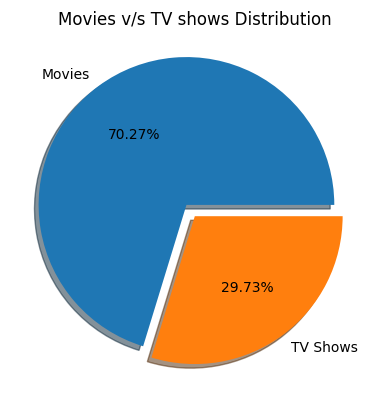

In [41]:
plt.pie(df.type.value_counts(), labels=['Movies', 'TV Shows'] , explode=(.095 , 0), autopct= '%0.2f%%', shadow=True)
plt.title("Movies v/s TV shows Distribution")
plt.show()

Inference:

    1>> Movies constitute 70% of Netflix's content.
    2>> The availability of TV shows is noticeably lower than that of movies.


Recommendations:

    1>> Expanding the TV show library would enhance viewer engagement, as serialized storytelling builds suspense and depth beyond what a 100-minute movie can offer.
    2>> Given that users enjoy binge-watching extended narratives, increasing TV show offerings could improve retention and satisfaction.

Lets see the content distribution across countries.

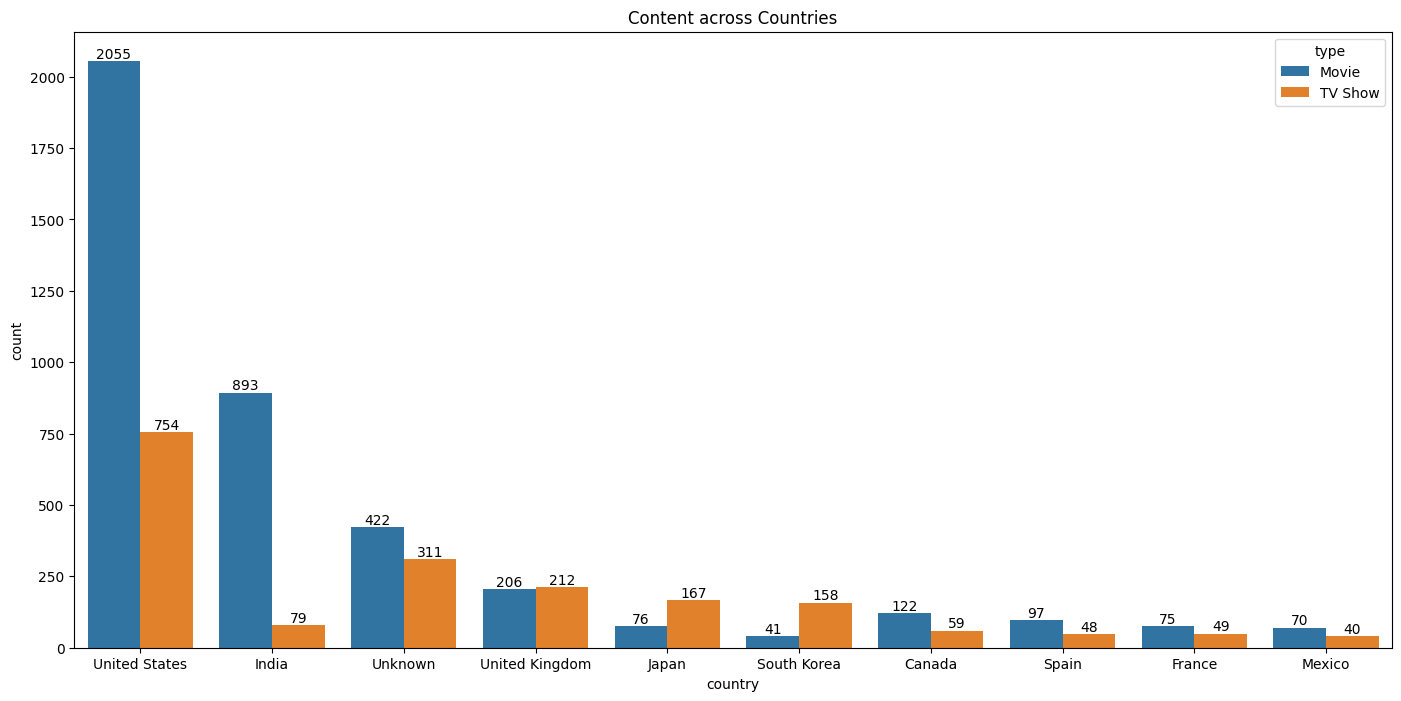

In [42]:
x = df['country'].value_counts().head(10)

plt.figure(figsize = (17,8))
label = sns.countplot(data = df, x = 'country', hue = 'type', order=x.index)
for i in label.containers:
    label.bar_label(i)
plt.title('Content across Countries')
plt.show()

**Inference:**  

- The U.S. has the largest collection of movies, followed by India and the UK.  
- TV shows are predominantly produced in the U.S. and the UK.  
- Most countries have a higher number of movies than TV shows, except for Japan and South Korea, where TV shows outnumber movies.  

**Recommendations:**  

- The gap between the number of movies and TV shows is particularly large in most countries, especially in India. This disparity should be reduced by increasing TV show offerings.  
- TV shows provide prolonged engagement, keeping users invested over multiple seasons rather than just a single 100-minute movie.  
- In recent years, TV shows have surged in popularity, becoming the preferred format for immersive storytelling and audience demand.

Lets see the top 10 Directors.

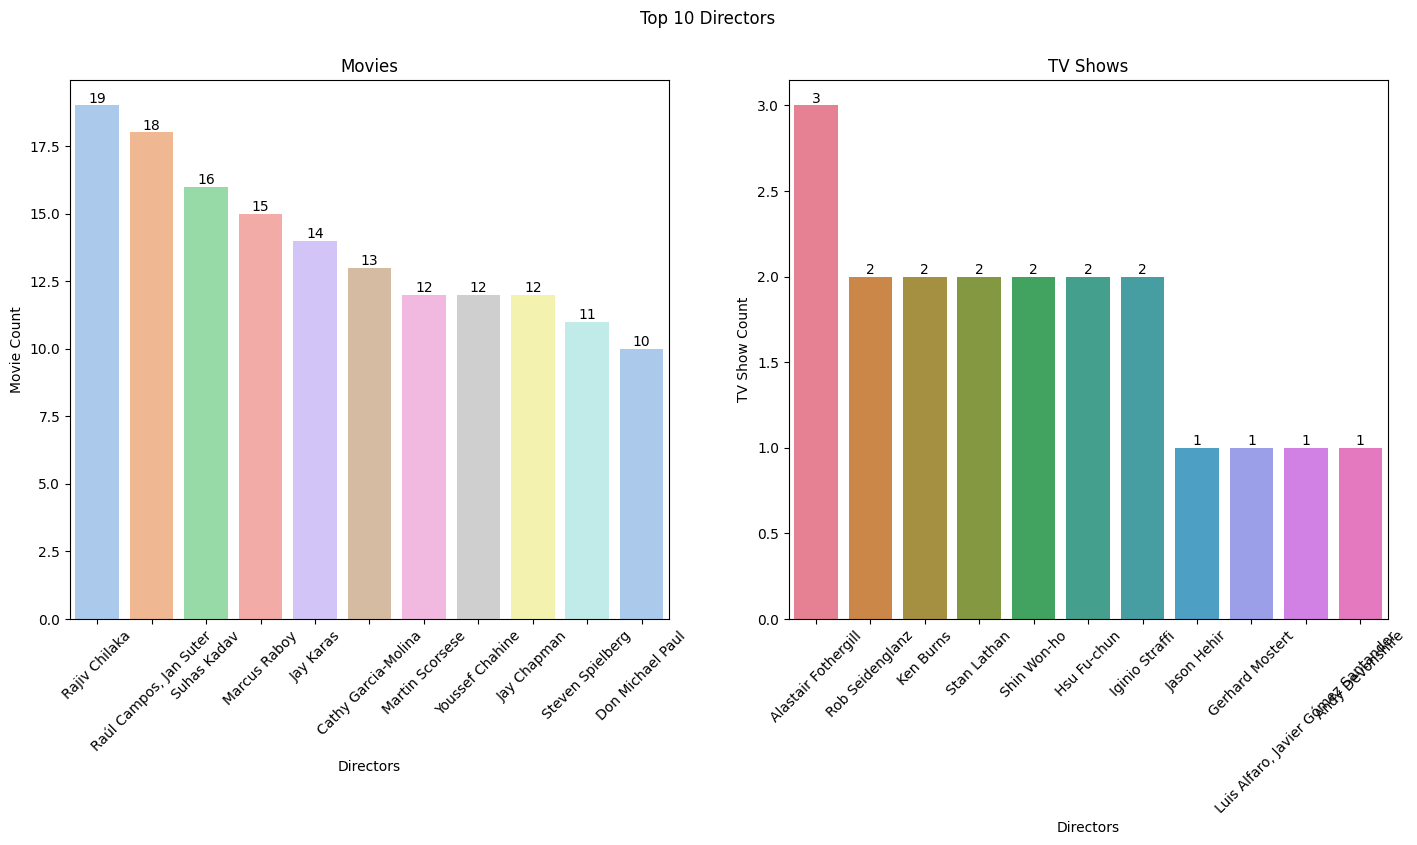

In [43]:
df_movies_temp = df_movies.drop_duplicates(subset = ['director','title'])
df_tvs_temp = df_tvs.drop_duplicates(subset = ['director','title'])

plt.figure(figsize = (17,7))
plt.suptitle('Top 10 Directors')

plt.subplot(1,2,1)
label = sns.countplot(data=df_movies_temp, x='director', order = df_movies_temp['director'].value_counts()[1:12].index , palette="pastel")

for i in label.containers:
    label.bar_label(i)
plt.title("Movies")
plt.xticks(rotation=45)
plt.xlabel('Directors')
plt.ylabel('Movie Count')

plt.subplot(1,2,2)
label = sns.countplot(data=df_tvs_temp, x='director', order = df_tvs_temp['director'].value_counts()[1:12].index , palette="husl")
for i in label.containers:
    label.bar_label(i)
plt.title("TV Shows")
plt.xticks(rotation=45)
plt.xlabel('Directors')
plt.ylabel('TV Show Count')

plt.show()


**Inference:**  

- Rajiv Chilaka, Jan Suter, and Raul Campos are the most prolific directors, having directed 22, 21, and 19 movies, respectively.  
- In contrast, TV show directors typically have only 2-3 shows to their name, indicating a significant difference in output between movie and TV show direction.

Lets see the top 10 Genres

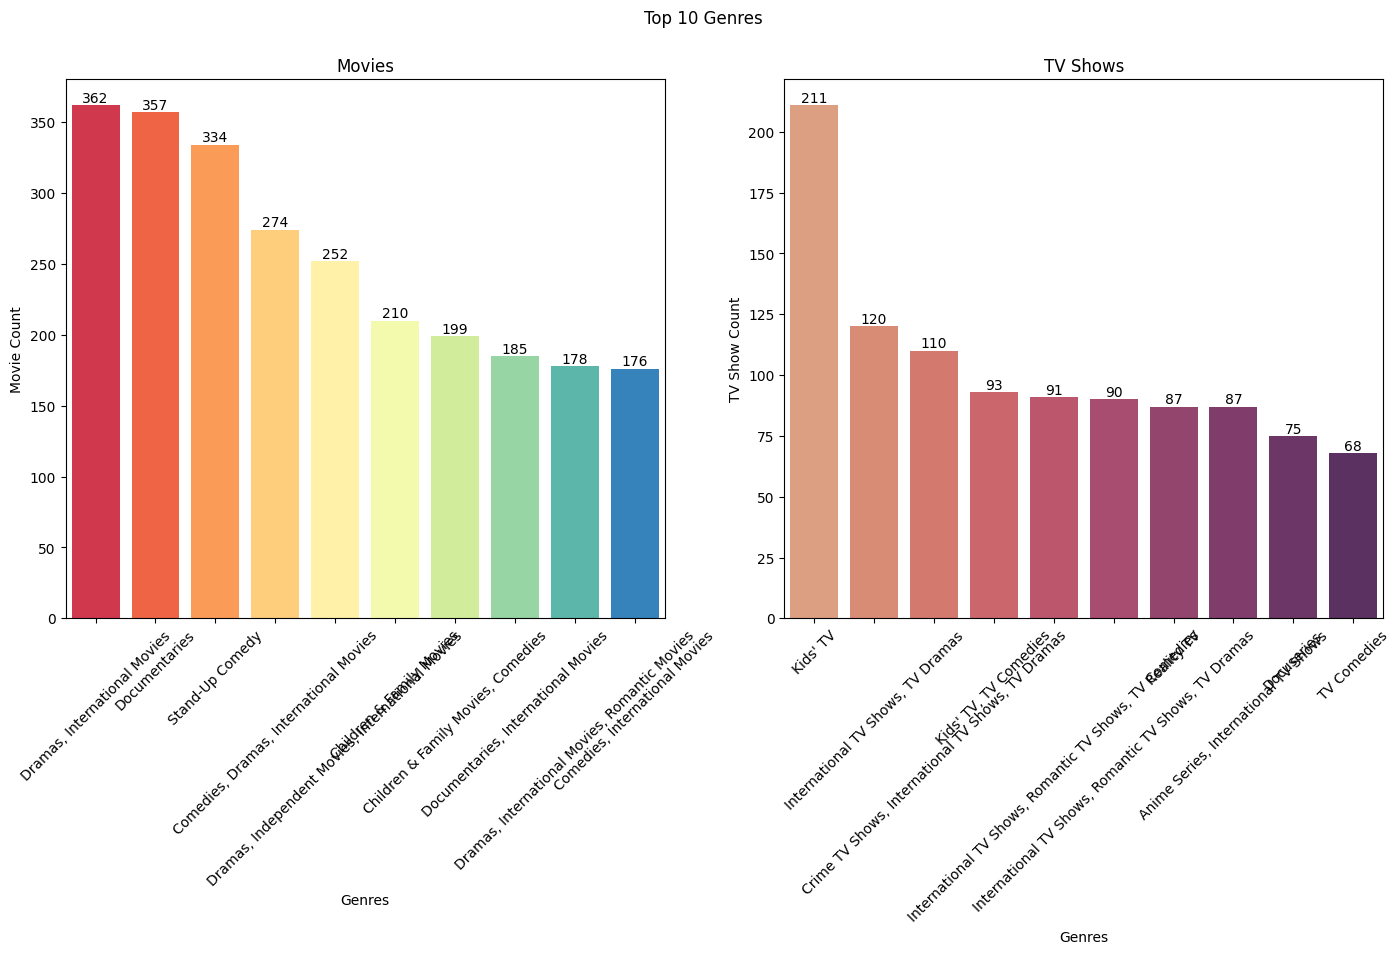

In [44]:
df_movies_temp = df_movies.drop_duplicates(subset = ['Genre','title'])
df_tvs_temp = df_tvs.drop_duplicates(subset = ['Genre','title'])

plt.figure(figsize = (17,7))
plt.suptitle('Top 10 Genres')

plt.subplot(1,2,1)
label = sns.countplot(data= df_movies, x='Genre', order = df_movies['Genre'].value_counts().head(10).index , palette="Spectral"  ,saturation=1.0)
for i in label.containers:
    label.bar_label(i)
plt.title("Movies")
plt.xticks(rotation=45)
plt.xlabel('Genres')
plt.ylabel('Movie Count')

plt.subplot(1,2,2)
label = sns.countplot(data=df_tvs, x='Genre', order = df_tvs['Genre'].value_counts().head(10).index, palette="flare" )  
for i in label.containers:
    label.bar_label(i)
plt.title("TV Shows")
plt.xticks(rotation=45)
plt.xlabel('Genres')
plt.ylabel('TV Show Count')

plt.show()

**Inference:**  

- The majority of content falls under the International genre, followed by Drama and Comedy.  

**Recommendations:**  

- The International genre has a significantly higher count compared to other genres in TV shows.  
- Netflix should diversify its content by adding more shows across different genres to cater to a wider audience.

Lets see the content available age group wise

In [45]:

df_movies.rating.value_counts()



rating
Adults    2858
Teens     1913
Kids      1260
NaN         78
Name: count, dtype: int64

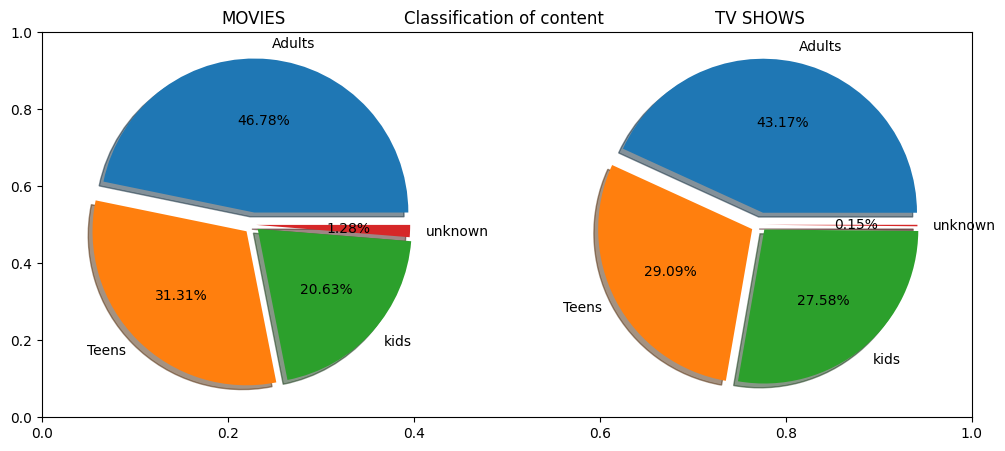

In [46]:
plt.figure(figsize=(12,5))
plt.title("Classification of content ")

plt.subplot(1,2,1)
plt.pie(x=df_movies['rating'].value_counts() , labels=['Adults', 'Teens', 'kids', 'unknown'] ,explode=(0.08, 0.06, 0.04, 0.02),  autopct='%0.2f%%', shadow=True)
plt.title("MOVIES")

plt.subplot(1,2,2)
plt.pie(x=df_tvs['rating'].value_counts() , labels=['Adults', 'Teens', 'kids', 'unknown'] ,explode=(0.08, 0.06, 0.04, 0.02),  autopct='%0.2f%%', shadow=True)
plt.title("TV SHOWS")
plt.show()

**Inference:**  

- The majority of Netflix content is targeted at adults, followed by content for teens and kids.  

**Recommendation:**  

- Increasing teen-focused content could help expand viewership and attract a younger audience segment.

In [47]:
print("Latest movie is released in the year:",  max(df['release_year'] ))
print("Oldest movie is released in the year:",  min(df['release_year']))

Latest movie is released in the year: 2021
Oldest movie is released in the year: 1942


Lets see the average duration of a movie and a average season of TV Show

In [50]:
df_movies.duration.mean()

np.float64(99.65984612866262)

In [49]:
df_movies['duration'] = df_movies['duration'].astype(int)

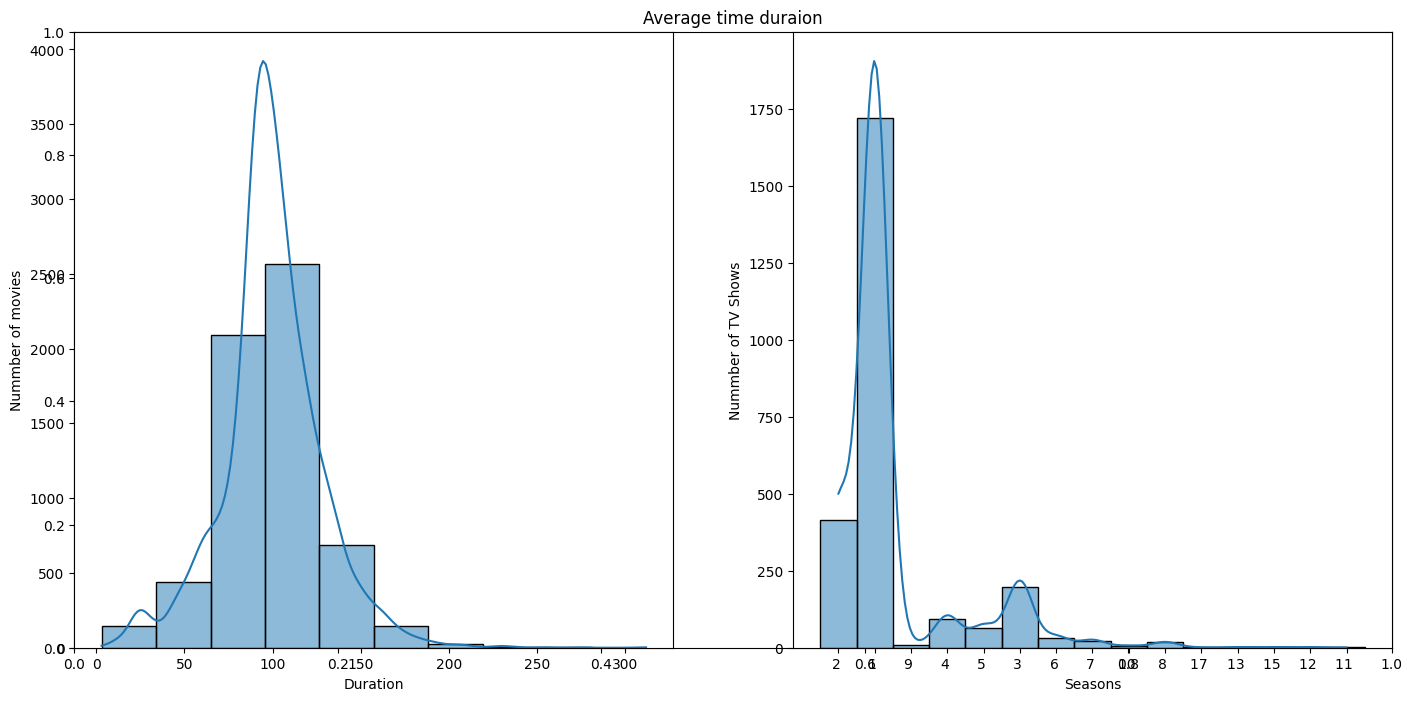

In [ ]:
plt.figure(figsize=(17,8))
plt.title("Average time duraion")

plt.subplot(1,2,1)
sns.histplot(x= df_movies['duration'],bins=10 , kde=True)
plt.xlabel("Duration")
plt.ylabel("Nummber of movies")

plt.subplot(1,2,2)
sns.histplot(x= df_tvs['duration'],bins=10 , kde=True)
plt.xlabel("Seasons")
plt.ylabel("Nummber of TV Shows")


plt.show()

**Inference:**  

- The majority of movies (approximately 4,500) have a duration between 65 and 125 minutes.  
- Most TV shows (around 2,200) typically run for about two seasons.  

**Recommendations:**  

- Movies should ideally have a duration between 65 and 125 minutes to align with existing content trends.  
- TV shows should aim for 2-3 seasons to maintain audience engagement while ensuring a well-paced storyline.

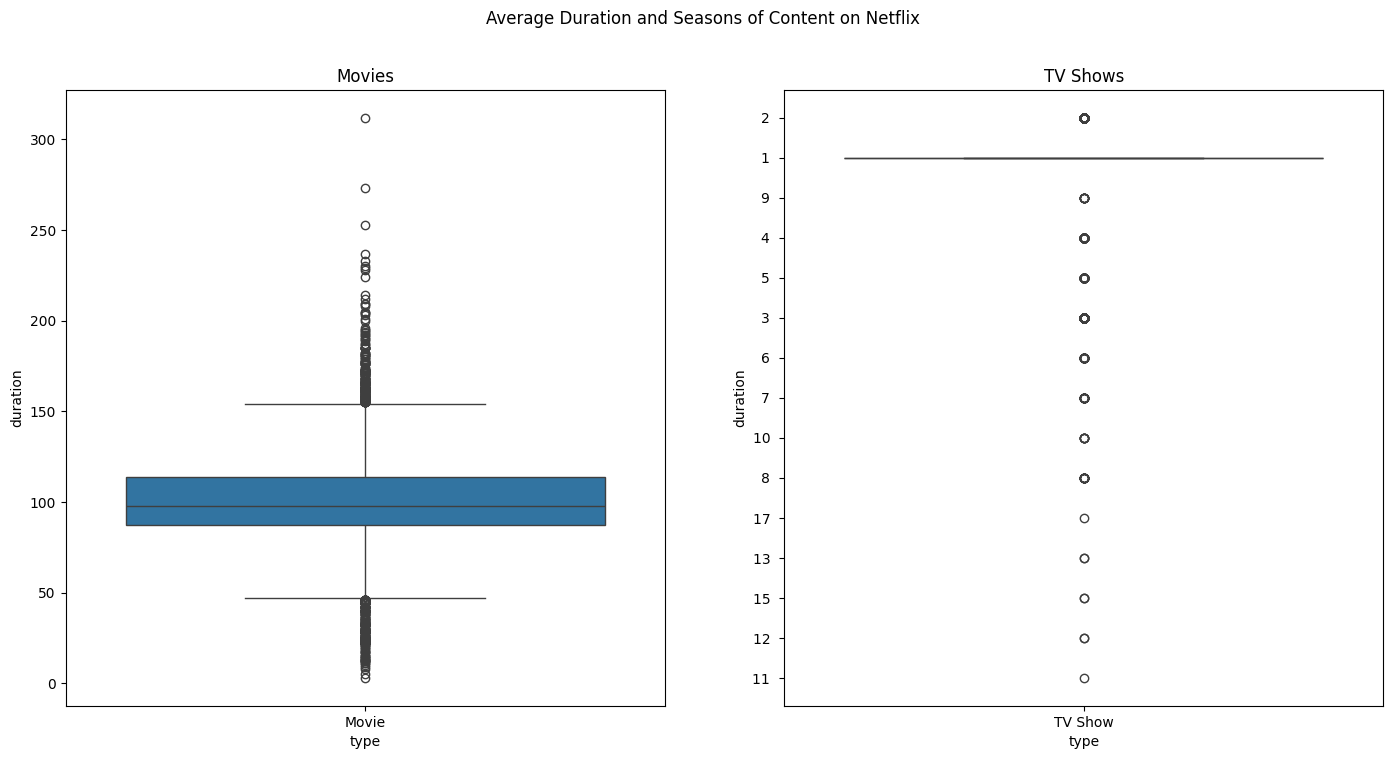

In [51]:
df_movies_temp['duration'] = df_movies_temp['duration'].astype(int)
df_tvs_temp['seasons'] = df_tvs_temp['duration'].astype(int)

plt.figure(figsize=(17,8))
plt.suptitle('Average Duration and Seasons of Content on Netflix')

plt.subplot(1,2,1)
sns.boxplot(df_movies_temp, x='type', y='duration')
plt.title('Movies')

plt.subplot(1,2,2)
sns.boxplot(df_tvs_temp, x='type', y='duration')
plt.title('TV Shows')

plt.show()

**Inference:**  

- The median duration of a movie on Netflix is approximately 100 minutes.  
- The median number of seasons for a TV show is 1.  
- Most movies have a duration between 50 and 160 minutes.  
- The majority of TV shows have 1, 2, or 3 seasons.  

**Recommendations:**  

- To maintain audience engagement, movies should ideally have a duration of up to 160 minutes.  
- TV shows should aim for up to 3 seasons to ensure sustained viewer interest and storyline development.

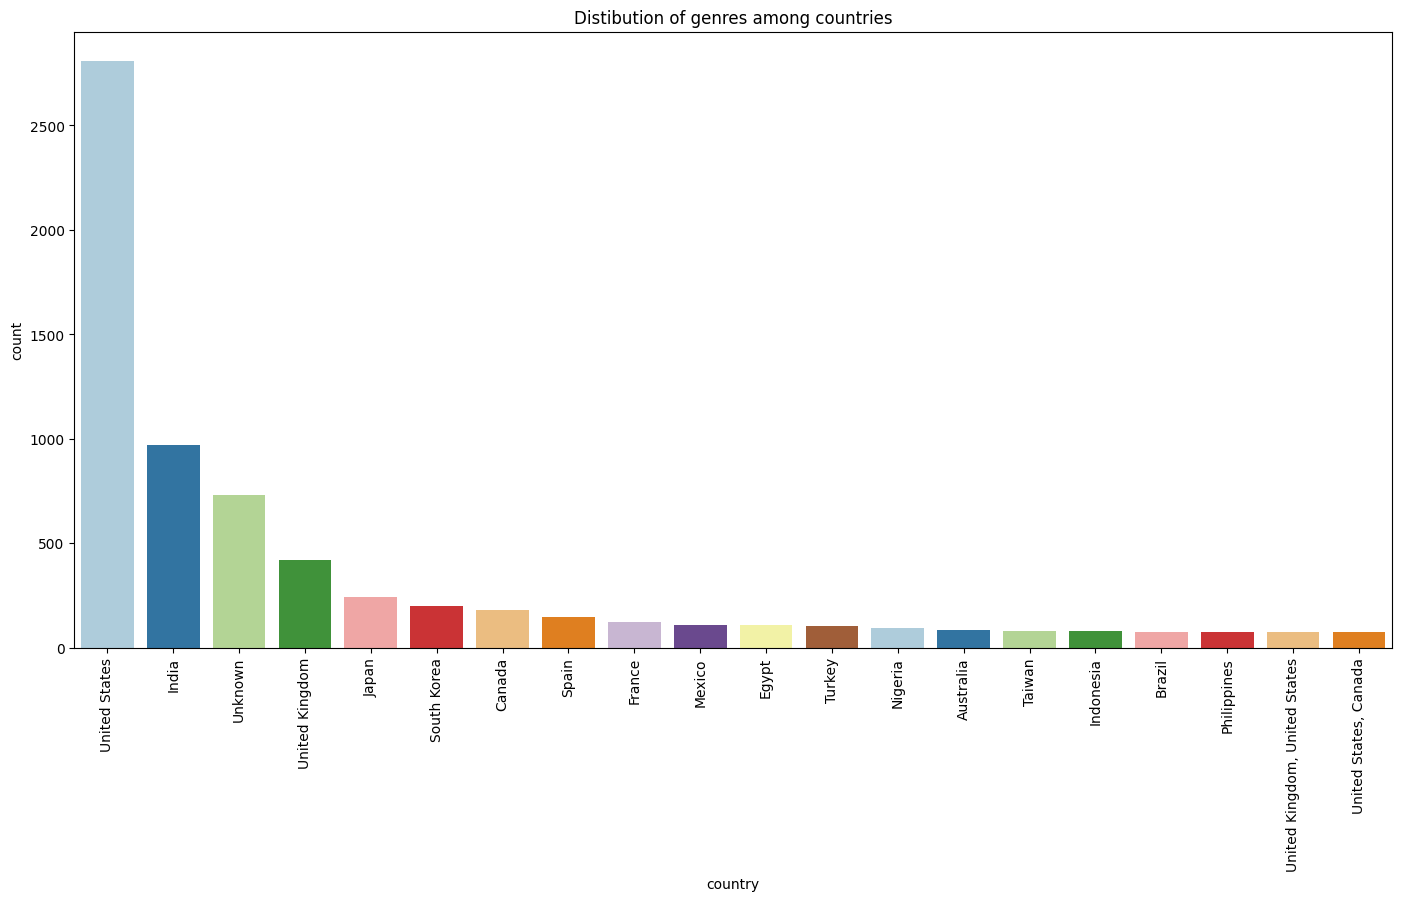

In [ ]:
df_temp = df.drop_duplicates(subset = ['country','title'])

plt.figure(figsize=(17,8))
plt.title('Distibution of genres among countries')
sns.countplot(data=df_temp, x='country', dodge=False, order = df_temp['country'].value_counts().head(20).index, palette='Paired')
plt.xticks(rotation=90)
plt.show()



**Inference:**  
- The United States has the highest number of genre-based content, significantly more than any other country.  
- India follows next, indicating a strong presence of diverse genre content.  
  

**Recommendations:**  
- Netflix can focus on expanding content diversity in countries with lower representation to enhance its global reach.  
- The high content count in the U.S. suggests a dominance in genre variety; similar diversity can be encouraged in other regions.  


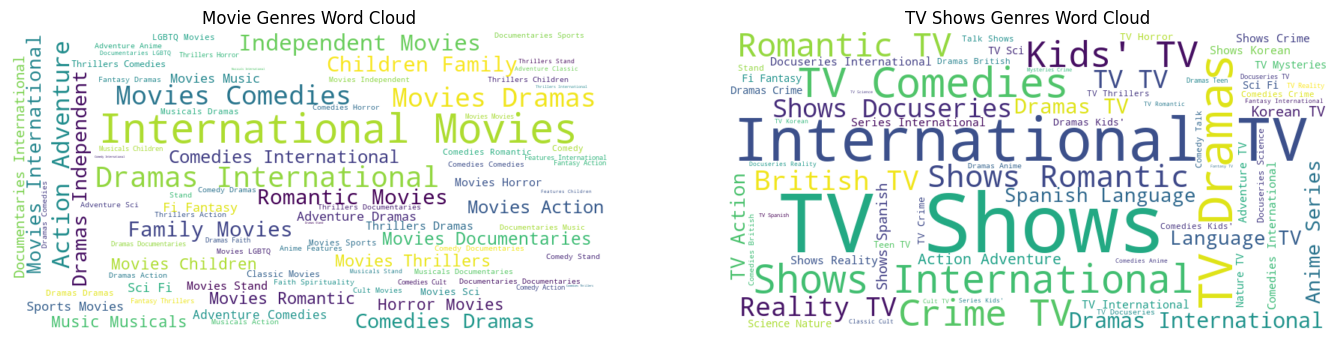

In [56]:
genre_text = " ".join(df_movies["Genre"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(genre_text)

plt.figure(figsize=(17, 10))

plt.subplot(1,2,1)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Movie Genres Word Cloud")

genre_text = " ".join(df_tvs["Genre"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(genre_text)

plt.subplot(1,2,2)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("TV Shows Genres Word Cloud")

plt.show()